<a href="https://colab.research.google.com/github/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/Week4/Python_data_visualization_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Types of graphs


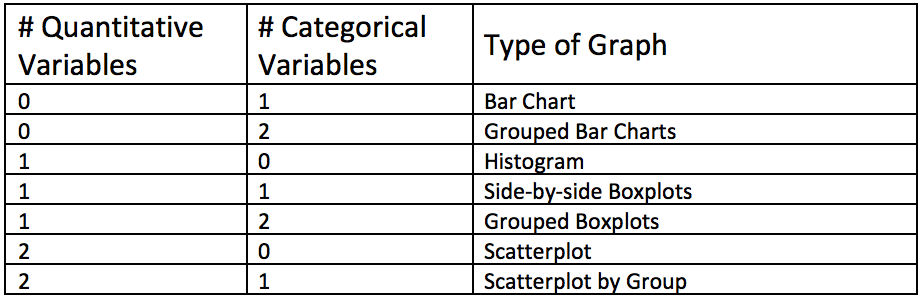

## With categorical data

*   Bar chart (great for counts)
*   Boxplot


## With quantitative data

* Line plot  
* Histogram
*   Scatterplot (with regression line)


Load the data and prepare the datasets

In [ ]:
df = pd.read_csv('https://github.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/blob/main/numpy/Week2_homework_data.csv?raw=true')

In [ ]:
df.head()

,Unnamed: 0,31-0.0,48-0.0,49-0.0,50-0.0,21002-0.0
0,0,0.0,80.0,103.0,169.0,68.6
1,1,0.0,80.0,96.0,185.0,70.2
2,2,1.0,89.0,97.0,164.0,71.5
3,3,0.0,101.0,108.0,159.0,82.9
4,4,1.0,97.0,107.0,186.0,94.0


In [ ]:
dictionary = pd.read_csv('https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/numpy/Week2_homework_dictionary.csv')
dictionary.head()

,Unnamed: 0,Description,Code
0,0,Gender,31-0.0
1,1,Height [cm],50-0.0
2,2,Weight [Kg],21002-0.0
3,3,Waist circumference [cm],48-0.0
4,4,Hip circumference [cm],49-0.0


In [ ]:
# rename the dataframe columns

# dictionary comprehenesion converts a tuple in a dictionary
# dict((key, func(key)) for key in keys)
dictionary_columns = dict( (dictionary.loc[i, 'Code'], dictionary.loc[i, 'Description']) for i in dictionary.index)

# or using zip (makes tuples out of equally sized series/arrays)
dictionary_columns = dict(zip(dictionary['Code'], dictionary['Description']))

df = df.rename(columns = dictionary_columns)

df.head()

,Unnamed: 0,Gender,Waist circumference [cm],Hip circumference [cm],Height [cm],Weight [Kg]
0,0,0.0,80.0,103.0,169.0,68.6
1,1,0.0,80.0,96.0,185.0,70.2
2,2,1.0,89.0,97.0,164.0,71.5
3,3,0.0,101.0,108.0,159.0,82.9
4,4,1.0,97.0,107.0,186.0,94.0


In [ ]:
!wget https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
sales_data = pd.read_csv('company_sales_data.csv')

--2021-10-13 12:56:32--  https://pynative.com/wp-content/uploads/2019/01/company_sales_data.csv
Resolving pynative.com (pynative.com)... 172.66.43.37, 172.66.40.219, 2606:4700:3108::ac42:2b25, ...
Connecting to pynative.com (pynative.com)|172.66.43.37|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 659 [text/csv]
Saving to: ‘company_sales_data.csv’

company_sales_data. 100%[===================>]     659  --.-KB/s    in 0s      

2021-10-13 12:56:32 (20.8 MB/s) - ‘company_sales_data.csv’ saved [659/659]



In [ ]:
sales_data

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


In [ ]:
SNPs = pd.read_csv("https://raw.githubusercontent.com/araldi/HS21---Big-Data-Analysis-in-Biomedical-Research-376-1723-00L-/main/pandas/CD93_exomeSNPs_annotation.csv")
SNPs.head()

,Unnamed: 0,Variant name,Variant consequence,Protein allele,Transcript stable ID,PolyPhen score,PolyPhen prediction,SIFT score,SIFT prediction,Chromosome/scaffold name,Chromosome/scaffold position start (bp),Chromosome/scaffold position end (bp)
0,0,rs7492,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079620,23079620
1,1,rs2567612,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082535,23082535
2,2,rs2749811,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23079544,23079544
3,3,rs2749812,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082290,23082290
4,4,rs2749813,3_prime_UTR_variant,NaN,ENST00000246006,NaN,NaN,NaN,NaN,20,23082347,23082347


In [ ]:
# import useful datasets
chipotle = pd.read_csv('https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv', sep= '\t')
chipotle.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


In [ ]:
tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Categorical plots

## Barplot

<BarContainer object of 14 artists>

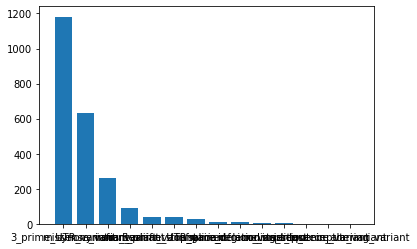

In [ ]:
# How many of each type of Variant consequence?
counts = SNPs['Variant consequence'].value_counts()
plt.bar(counts.index, counts.values)

<BarContainer object of 14 artists>

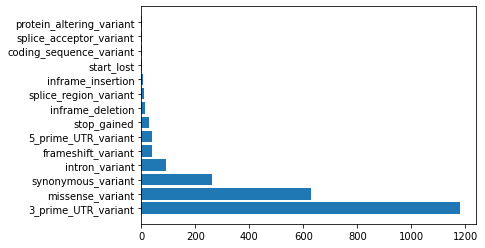

In [ ]:
# How many of each type of Variant consequence?
counts = SNPs['Variant consequence'].value_counts()
plt.barh(counts.index, counts.values)

<BarContainer object of 50 artists>

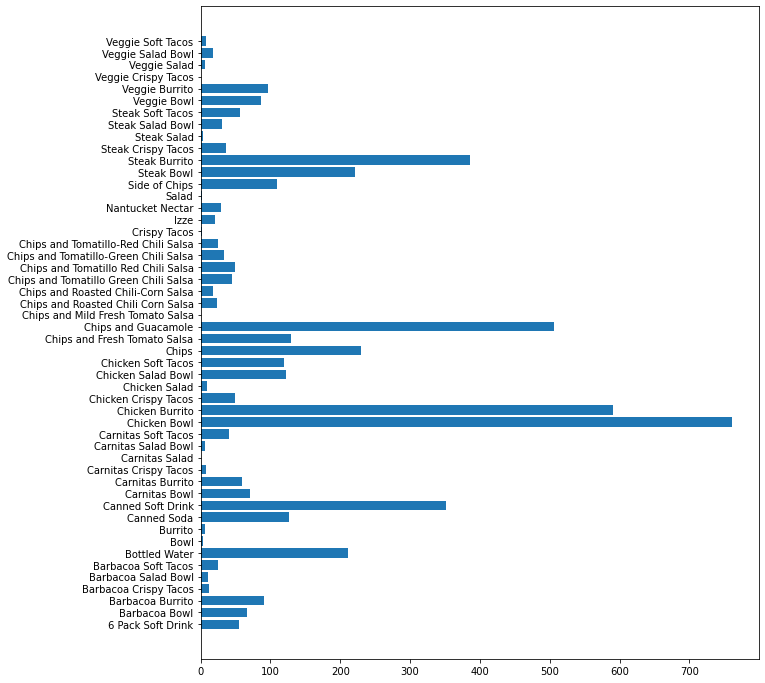

In [ ]:
#plot the cumulative quantity per item in chipotle
item_quantity= chipotle.groupby('item_name')['quantity'].sum()
plt.figure(figsize = (10, 12))
plt.barh(item_quantity.index, item_quantity.values)

### Exercise 1

Plot the total revenue of the chipotle items (like above, but considering item_price (remember that the dollars have to be converted into numbers!).

### Exercise 2

Plot how many males and females are in the df dataset.

## Boxplot

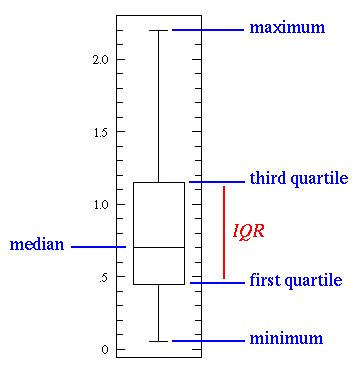

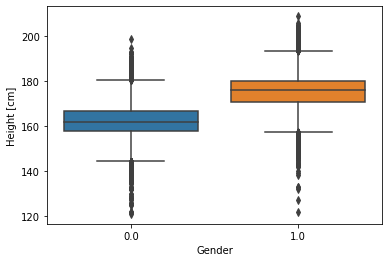

In [ ]:

sns.boxplot(x = "Gender", y = 'Height [cm]', data = df)

Text(0.5, 1.0, 'Height in a population')

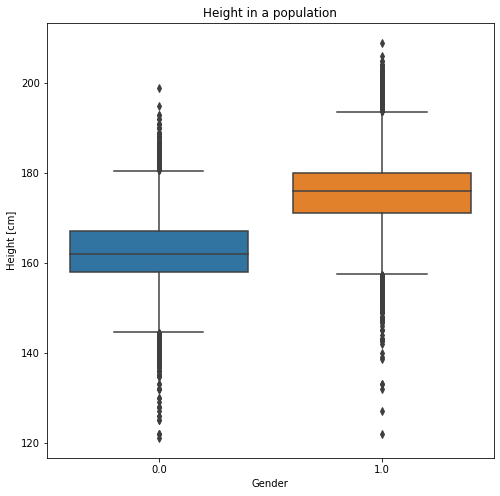

In [ ]:
plt.figure(figsize = (8,8)) # change plot size
sns.boxplot(x = "Gender", y = 'Height [cm]', data = df)

plt.title('Height in a population')

Text(0.5, 1.0, 'Height in a population')

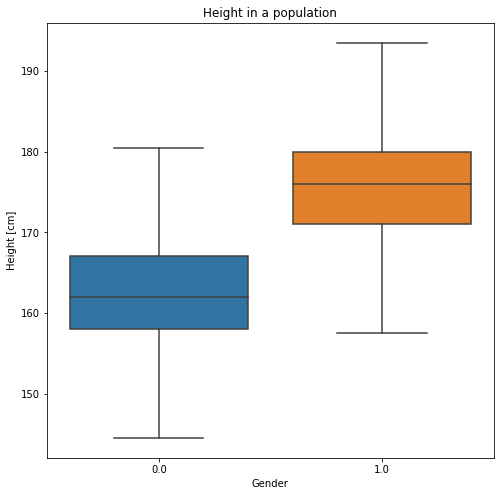

In [ ]:


plt.figure(figsize = (8,8))
sns.boxplot(x = "Gender", y = 'Height [cm]', data = df, showfliers=False) #remove outliers

plt.title('Height in a population')

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Height  in a population')

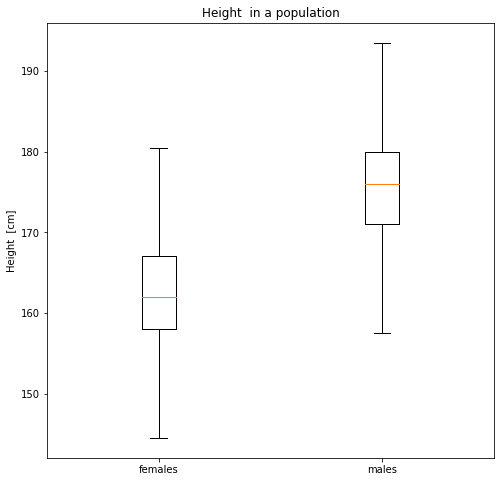

In [ ]:
plt.figure(figsize = (8,8))

data = [df[df['Gender'] == 0]['Height [cm]'], df[df['Gender'] == 1]['Height [cm]']] #give a series of data to plot
plt.boxplot(data, showfliers=False, labels = ['females', 'males']) #and assign labels
plt.ylabel('Height  [cm]')
plt.title('Height in a population')

### Exercise 3

Plot the average waist circumference and hip circumference measurement of males and females (two plots). 

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


Text(0.5, 1.0, 'Waist circumference in a population')

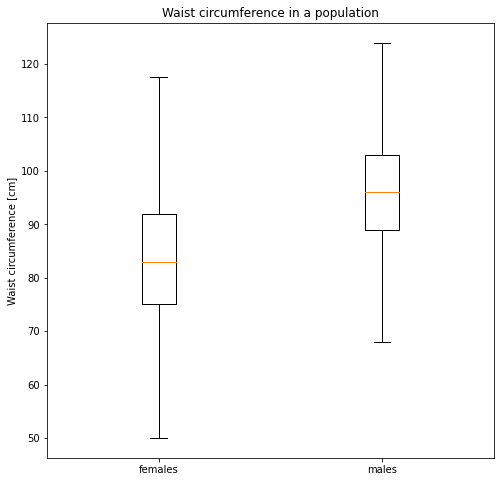

In [ ]:
plt.figure(figsize = (8,8))

data = [df[df['Gender'] == 0]['Waist circumference [cm]'], df[df['Gender'] == 1]['Waist circumference [cm]']] #give a series of data to plot
plt.boxplot(data, showfliers=False, labels = ['females', 'males']) #and assign labels
plt.ylabel('Waist circumference [cm]')
plt.title('Waist circumference in a population')

### Exercise 4

Plot two boxplots describing PolyPhen and SIFT scores of Variant consequences of the SNPs dataset.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text major ticklabel objects>)

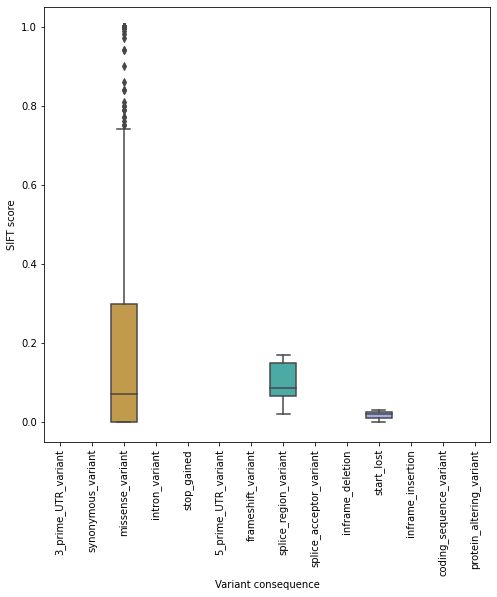

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Variant consequence", y = 'SIFT score', data = SNPs)#, showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution of SIFT score in SNPs')

Text(0.5, 1.0, 'Distribution of PolyPhen score in SNPs')

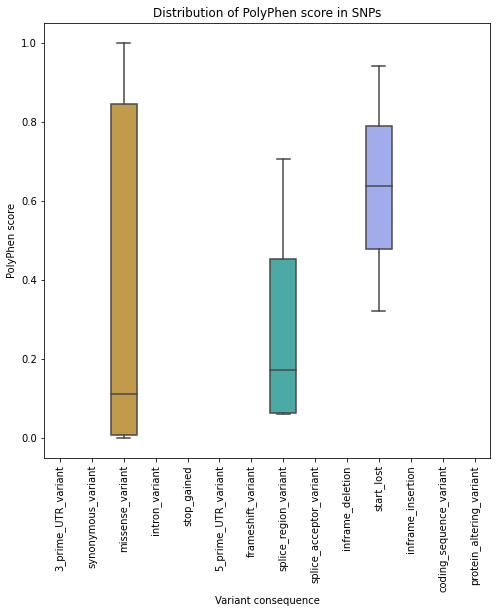

In [ ]:
plt.figure(figsize = (8,8))
sns.boxplot(x = "Variant consequence", y = 'PolyPhen score', data = SNPs)#, showfliers=False)
plt.xticks(rotation=90)
plt.title('Distribution of PolyPhen score in SNPs')

# Quantitative plots

## Line plot

In [ ]:
sales_data

,month_number,facecream,facewash,toothpaste,bathingsoap,shampoo,moisturizer,total_units,total_profit
0,1,2500,1500,5200,9200,1200,1500,21100,211000
1,2,2630,1200,5100,6100,2100,1200,18330,183300
2,3,2140,1340,4550,9550,3550,1340,22470,224700
3,4,3400,1130,5870,8870,1870,1130,22270,222700
4,5,3600,1740,4560,7760,1560,1740,20960,209600
5,6,2760,1555,4890,7490,1890,1555,20140,201400
6,7,2980,1120,4780,8980,1780,1120,29550,295500
7,8,3700,1400,5860,9960,2860,1400,36140,361400
8,9,3540,1780,6100,8100,2100,1780,23400,234000
9,10,1990,1890,8300,10300,2300,1890,26670,266700


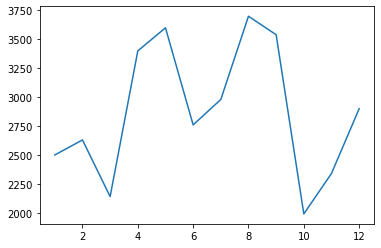

In [ ]:
plt.plot(sales_data['month_number'], sales_data['facecream'])

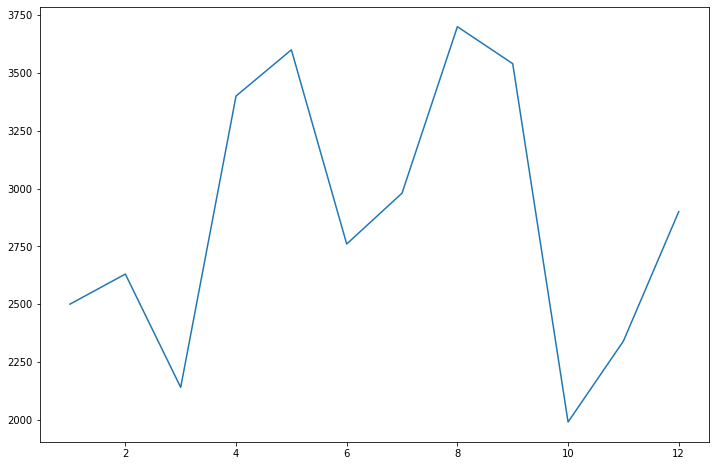

In [ ]:
plt.figure(figsize=(12,8)) #change size of graph
plt.plot(sales_data['month_number'], sales_data['facecream'])

(0.0, 3785.5)

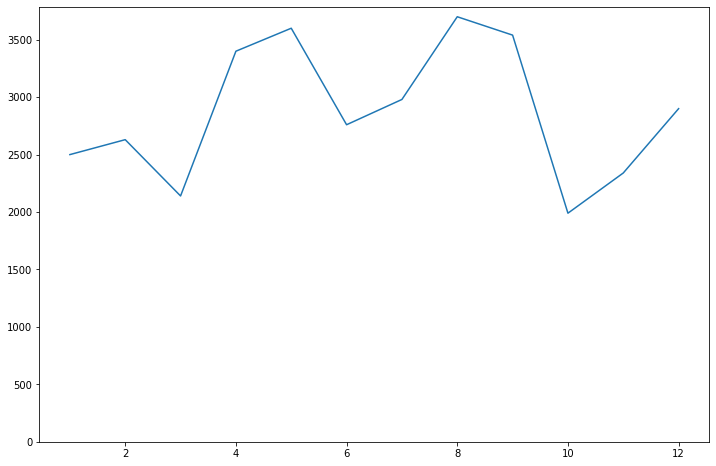

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'])
plt.ylabel("revenue [$]") # add label
plt.xlabel("month") # add label


(0.0, 3785.5)

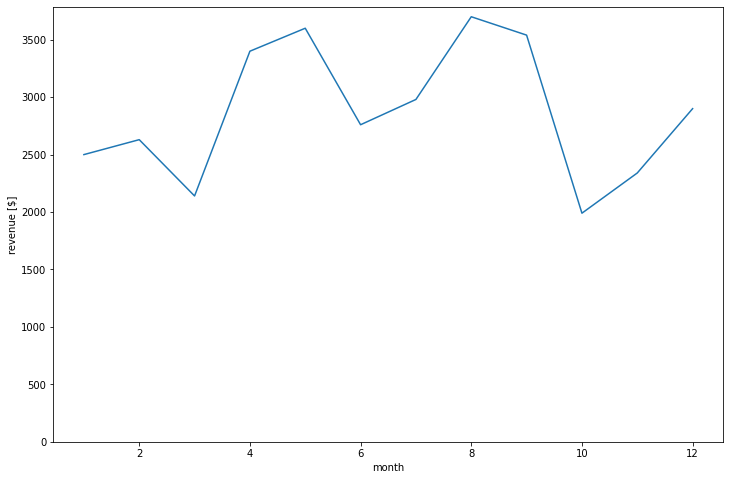

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'])
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.ylim(0,) # restrict the limit

### Exercise 5

Plot the moisturizer sales, showing only data from May until September.

HINT: use xlim()

## Histograms

(array([1.00000e+00, 4.00000e+01, 5.27870e+04, 2.07307e+05, 1.94357e+05,
        4.01680e+04, 4.11500e+03, 4.14000e+02, 2.30000e+01, 2.00000e+00]),
 array([ 20. ,  37.7,  55.4,  73.1,  90.8, 108.5, 126.2, 143.9, 161.6,
        179.3, 197. ]),
 <a list of 10 Patch objects>)

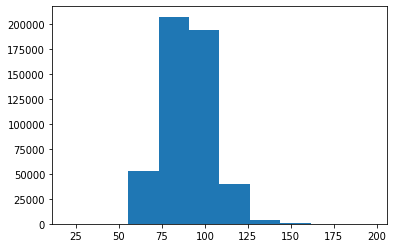

In [ ]:
plt.hist(x = df['Waist circumference [cm]'])


Text(0.5, 1.0, 'Waist circumference in a population')

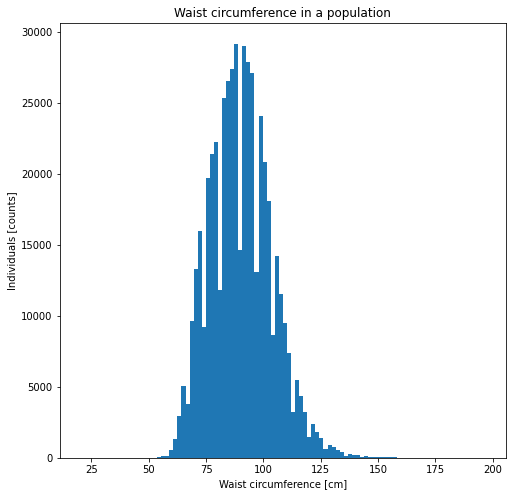

In [ ]:
# a bit better looking
plt.figure(figsize = (8,8))
plt.hist(x = df['Waist circumference [cm]'], bins=100) # change the number of bins

plt.xlabel('Waist circumference [cm]')
plt.ylabel('Individuals [counts]')
plt.title('Waist circumference in a population')

### Exercise 7

Plot the distribution of tips between male and female servers

Text(0, 0.5, 'bills')

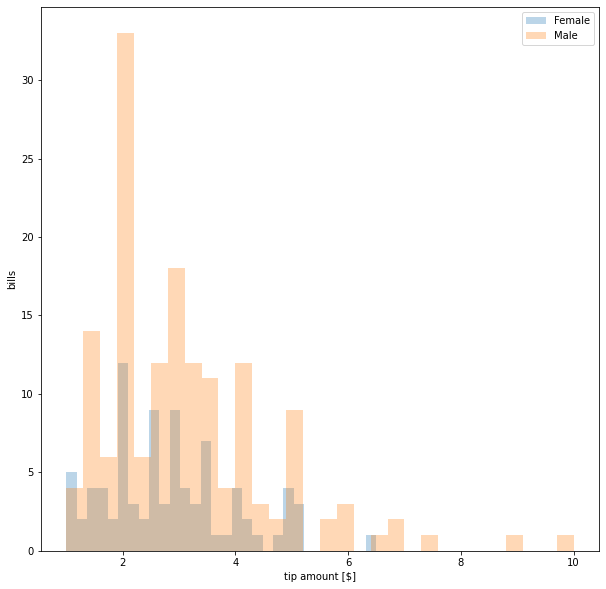

In [ ]:
plt.figure(figsize = (10,10))
for gender in ['Female', "Male"]:
  subset = tips[tips['sex'] == gender]
  plt.hist(subset['tip'], bins = 30, alpha = 0.3, label = gender)
plt.legend()
plt.xlabel('tip amount [$]')
plt.ylabel('bills')

### Exercise 8


Plot the distribution of tips in the tips dataset for each day of the week.

In [ ]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Text(0, 0.5, 'bills')

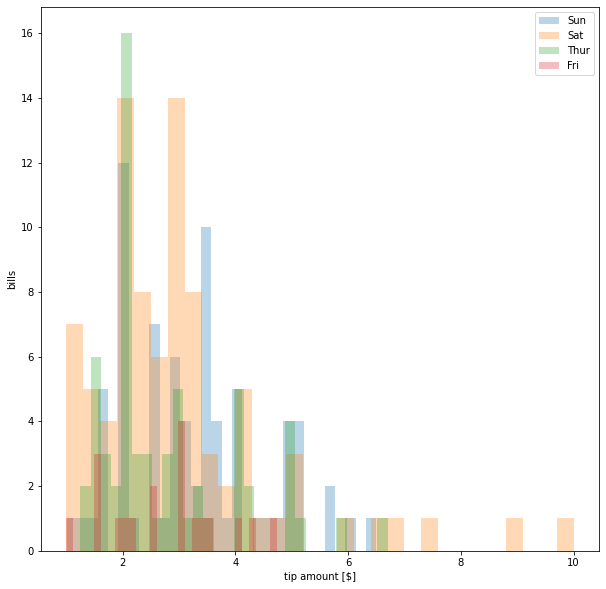

In [ ]:
plt.figure(figsize = (10,10))
for day in tips['day'].unique():
  subset = tips[tips['day'] == day]
  plt.hist(subset['tip'], bins = 30, alpha = 0.3, label = day)
plt.legend()
plt.xlabel('tip amount [$]')
plt.ylabel('bills')

## Scatterplot

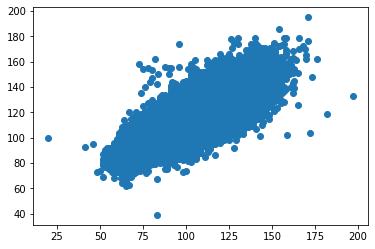

In [ ]:
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'])

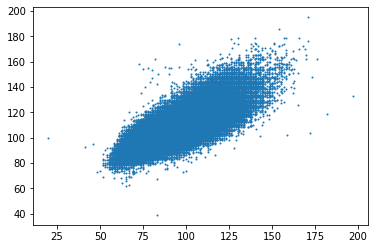

In [ ]:
# change the size of the markers
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1) # s changes the size


Text(0, 0.5, 'Hip circumference [cm]')

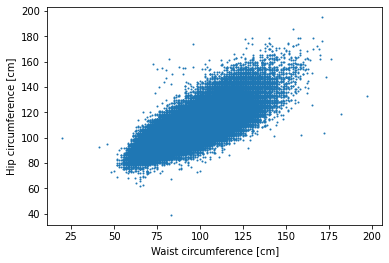

In [ ]:
# add x and y labels
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')

Text(0.5, 1.0, 'Waist and hip circumference in a population')

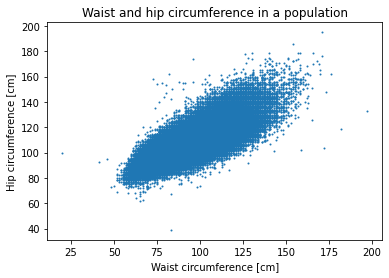

In [ ]:
# add plot title
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')
plt.title('Waist and hip circumference in a population')

Text(0.5, 1.0, 'Waist and hip circumference in a population')

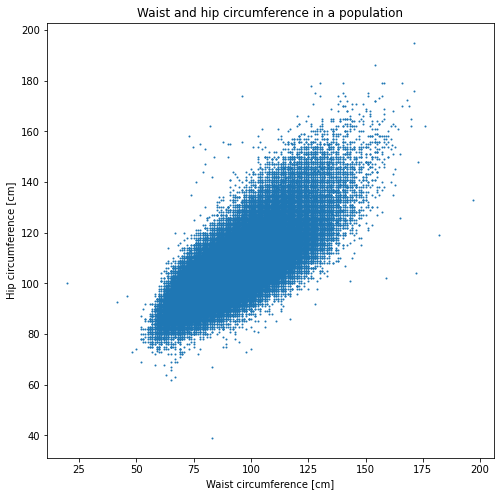

In [ ]:
# change the size of the plot
plt.figure(figsize = (8,8))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]')
plt.ylabel('Hip circumference [cm]')
plt.title('Waist and hip circumference in a population')

### Exercise 9

Plot total bill vs tip amount in every day of the week (tips dataset).


Text(0, 0.5, 'Tip [$]')

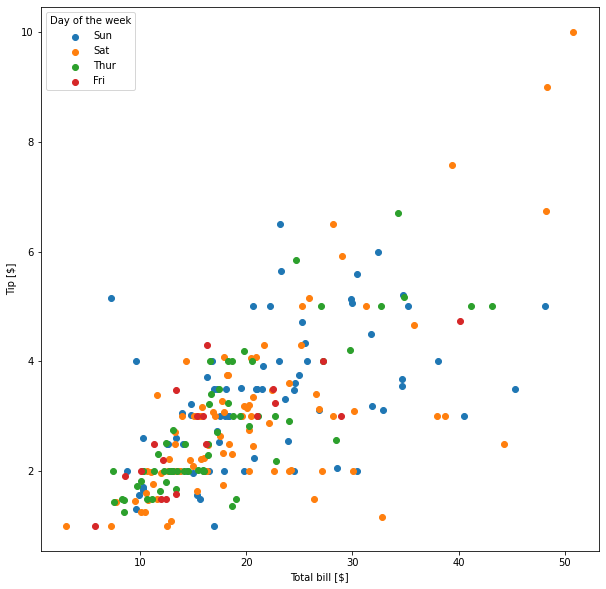

In [ ]:
plt.figure(figsize = (10,10))
for day in tips['day'].unique():
  subset = tips[tips['day'] == day]
  plt.scatter(subset['total_bill'], subset['tip'], label = day)

plt.legend(title='Day of the week')
plt.xlabel("Total bill [$]")
plt.ylabel('Tip [$]')

## Lm plot

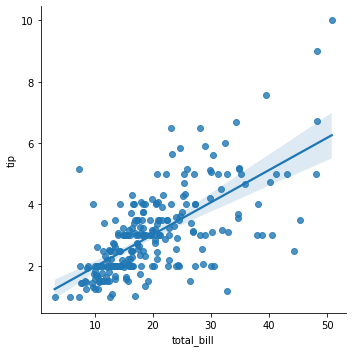

In [ ]:
sns.lmplot(x="total_bill", y="tip", data=tips)

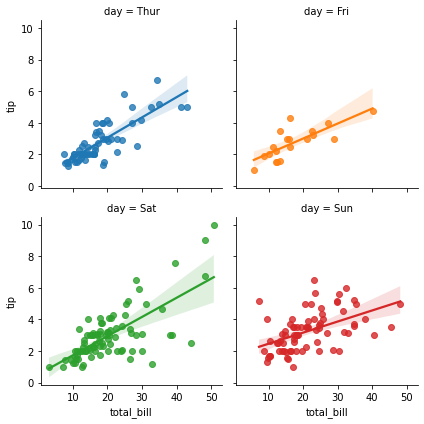

In [ ]:
sns.lmplot(x="total_bill", y="tip", col="day", hue="day",
               data=tips, col_wrap=2, height=3)

# Change the estethics of the plot

#### Download fonts

In [ ]:
!cd /usr/share/fonts/truetype/
!wget https://www.freefontspro.com/d/14454/arial.zip
!unzip arial.zip
!rm arial.zip
!ls

--2021-10-07 16:33:05--  https://www.freefontspro.com/d/14454/arial.zip
Resolving www.freefontspro.com (www.freefontspro.com)... 172.67.153.204, 104.21.90.75, 2606:4700:3033::6815:5a4b, ...
Connecting to www.freefontspro.com (www.freefontspro.com)|172.67.153.204|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 199153 (194K) [application/zip]
Saving to: ‘arial.zip’

arial.zip           100%[===================>] 194.49K  --.-KB/s    in 0.02s   

2021-10-07 16:33:05 (8.74 MB/s) - ‘arial.zip’ saved [199153/199153]

Archive:  arial.zip
  inflating: arial.ttf               
arial.ttf  caclaskoevenweight.ttf  humor-sans  liberation


In [ ]:
import matplotlib.font_manager as fm

path = '/usr/share/fonts/truetype/arial.ttf'
fontprop = fm.FontProperties(fname=path) # this is how you call Arial (or whatever font you choose)

In [ ]:
!wget https://www.freefontspro.com/d/11320/cac-lasko-even-weight.zip
!unzip cac-lasko-even-weight.zip
!rm cac-lasko-even-weight.zip
!ls

--2021-10-07 16:05:07--  https://www.freefontspro.com/d/11320/cac-lasko-even-weight.zip
Resolving www.freefontspro.com (www.freefontspro.com)... 104.21.90.75, 172.67.153.204, 2606:4700:3033::6815:5a4b, ...
Connecting to www.freefontspro.com (www.freefontspro.com)|104.21.90.75|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 32643 (32K) [application/zip]
Saving to: ‘cac-lasko-even-weight.zip’

cac-lasko-even-weig 100%[===================>]  31.88K  --.-KB/s    in 0s      

2021-10-07 16:05:07 (115 MB/s) - ‘cac-lasko-even-weight.zip’ saved [32643/32643]

Archive:  cac-lasko-even-weight.zip
  inflating: caclaskoevenweight.ttf  
caclaskoevenweight.ttf	humor-sans  liberation


In [ ]:
path = '/usr/share/fonts/truetype/caclaskoevenweight.ttf'
fontprop2 = fm.FontProperties(fname=path) # this is how you call Arial (or whatever font you choose)

In [ ]:
!wget https://www.wfonts.com/download/data/2014/06/05/comic-sans-ms/comic-sans-ms.zip
!unzip comic-sans-ms.zip
! rm comic-sans-ms.zip
! ls

--2021-10-07 16:39:08--  https://www.wfonts.com/download/data/2014/06/05/comic-sans-ms/comic-sans-ms.zip
Resolving www.wfonts.com (www.wfonts.com)... 104.225.219.210
Connecting to www.wfonts.com (www.wfonts.com)|104.225.219.210|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572768 (559K) [application/octetstream]
Saving to: ‘comic-sans-ms.zip’

comic-sans-ms.zip   100%[===================>] 559.34K  --.-KB/s    in 0.1s    

2021-10-07 16:39:08 (3.97 MB/s) - ‘comic-sans-ms.zip’ saved [572768/572768]



In [ ]:
path = '/usr/share/fonts/truetype/COMIC.TTF'
fontprop3 = fm.FontProperties(fname=path) # this is how you call Arial (or whatever font you choose)

Text(0.5, 1.0, 'Waist and hip circumference in a population')

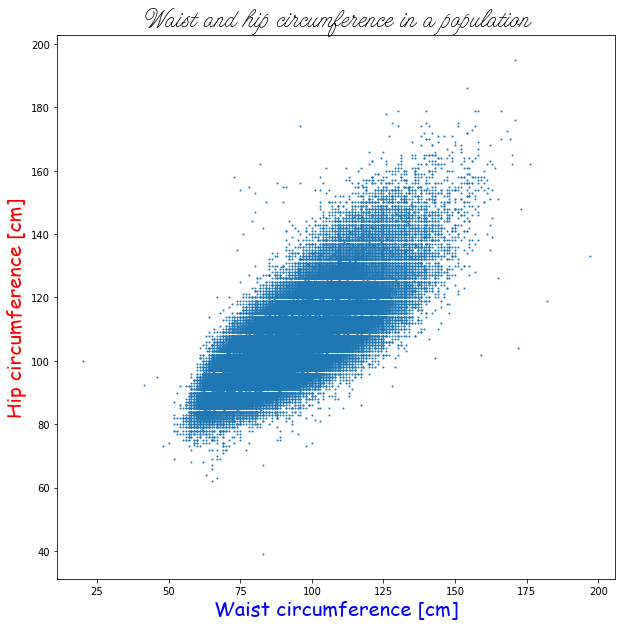

In [ ]:
# change font/color of labels/titles
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 30)

### Change properties of graph


(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

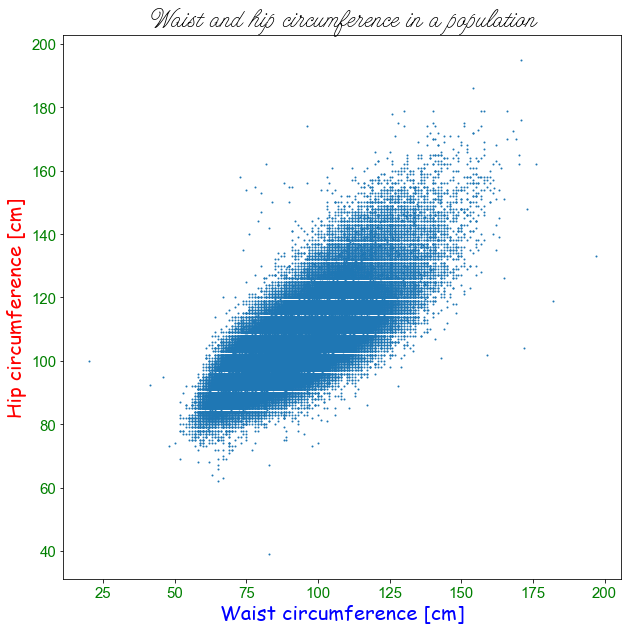

In [ ]:
# change the properties of x and y ticks
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1)
plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 30)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )  # x ticks properties
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 ) # y ticks properties

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

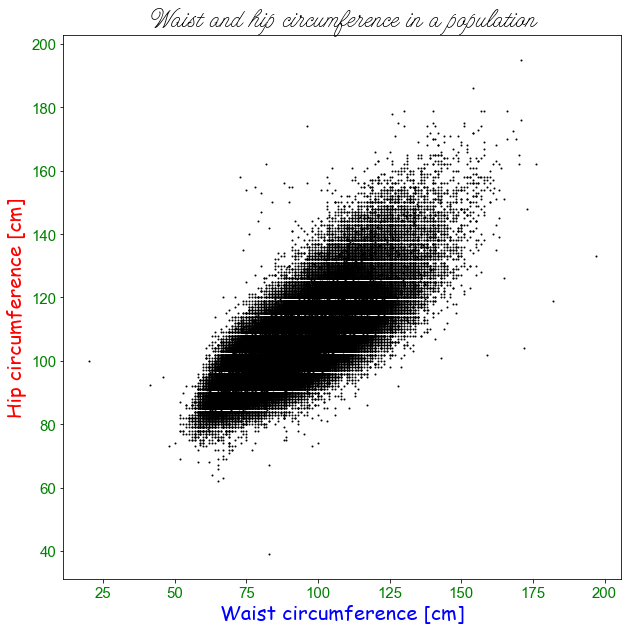

In [ ]:
# change the color of markers
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=1, c='k') # c changes the colors
plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 30)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

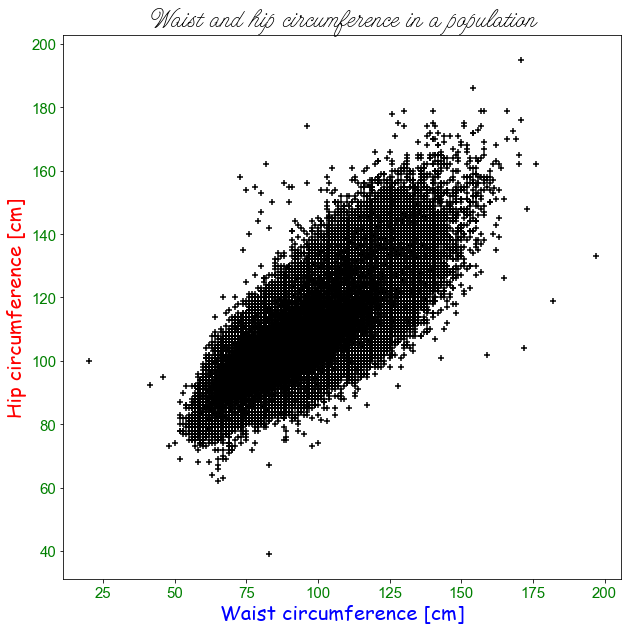

In [ ]:
# change the marker
plt.figure(figsize = (10,10))
plt.scatter(x = df['Waist circumference [cm]'], y = df['Hip circumference [cm]'], s=30, c='k', marker='+')  # change the marker
plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 30)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )

### Multiple plots in one

(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

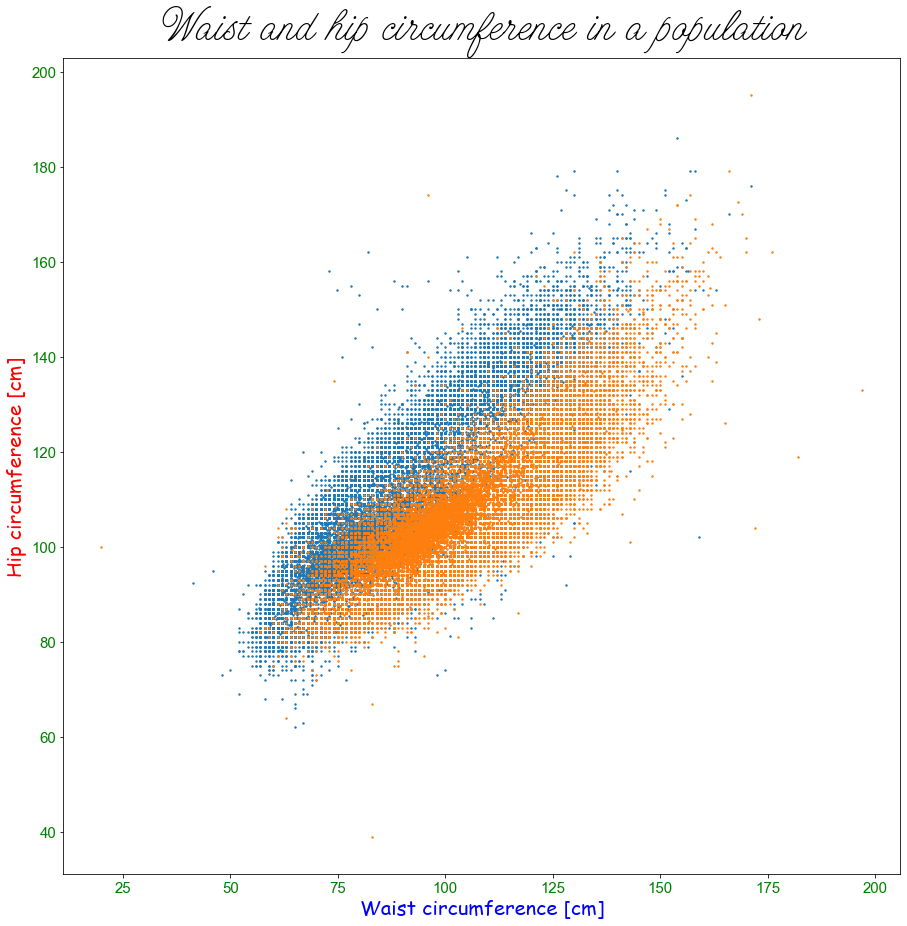

In [ ]:
plt.figure(figsize = (15,15))
# plot for females
df1 = df[df['Gender'] == 0]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)

# plot for males
df1 = df[df['Gender'] == 1]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )

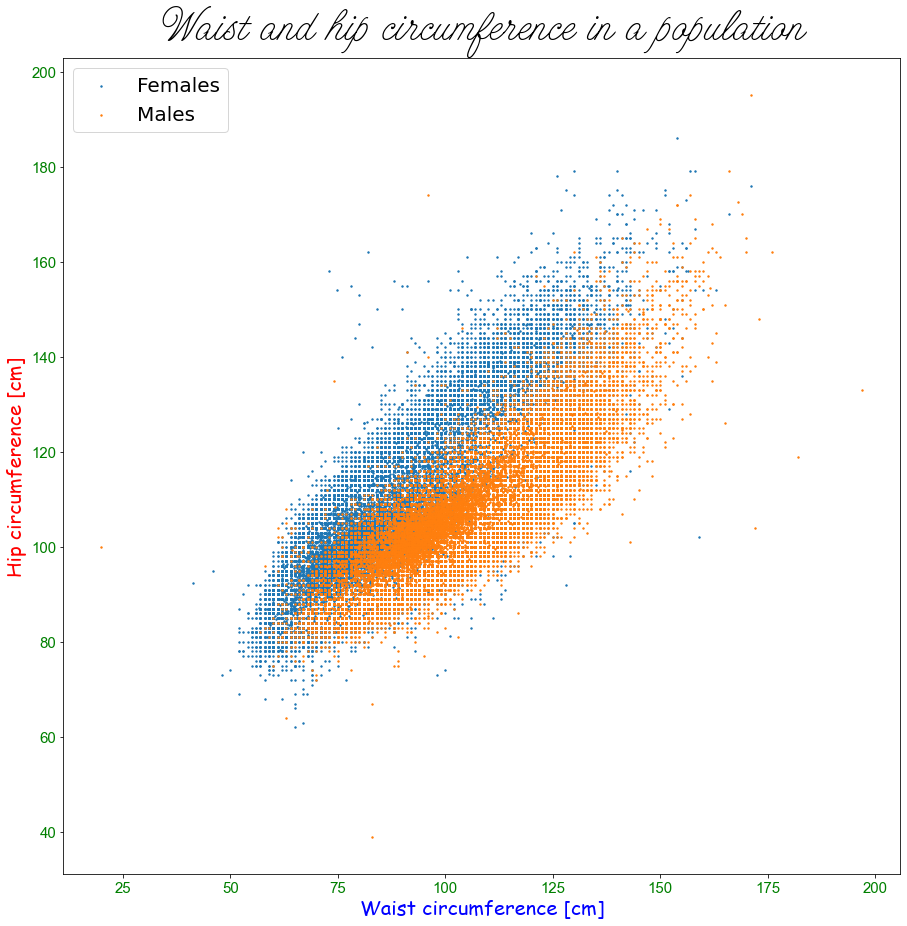

In [ ]:
plt.figure(figsize = (15,15))
# plot for females
df1 = df[df['Gender'] == 0]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, label = 'Females') # add label

# plot for males
df1 = df[df['Gender'] == 1]
plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, label = 'Males')  # add label

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.legend(fontsize = 20) # add legend

0
1


(array([ 20.,  40.,  60.,  80., 100., 120., 140., 160., 180., 200., 220.]),
 <a list of 11 Text major ticklabel objects>)

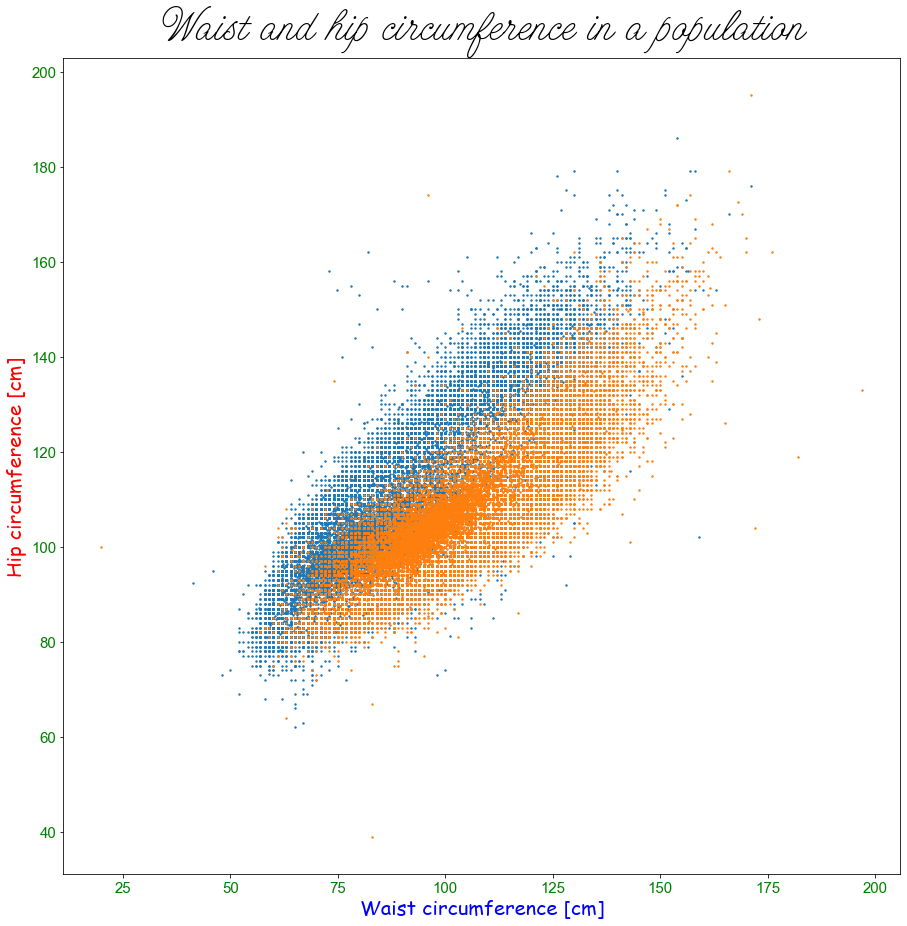

In [ ]:
plt.figure(figsize = (15,15))

# run a loop to plot multiple scatters

for gender in range(0,2):
  print(gender)
  df1 = df[df['Gender'] == gender]
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2)

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )

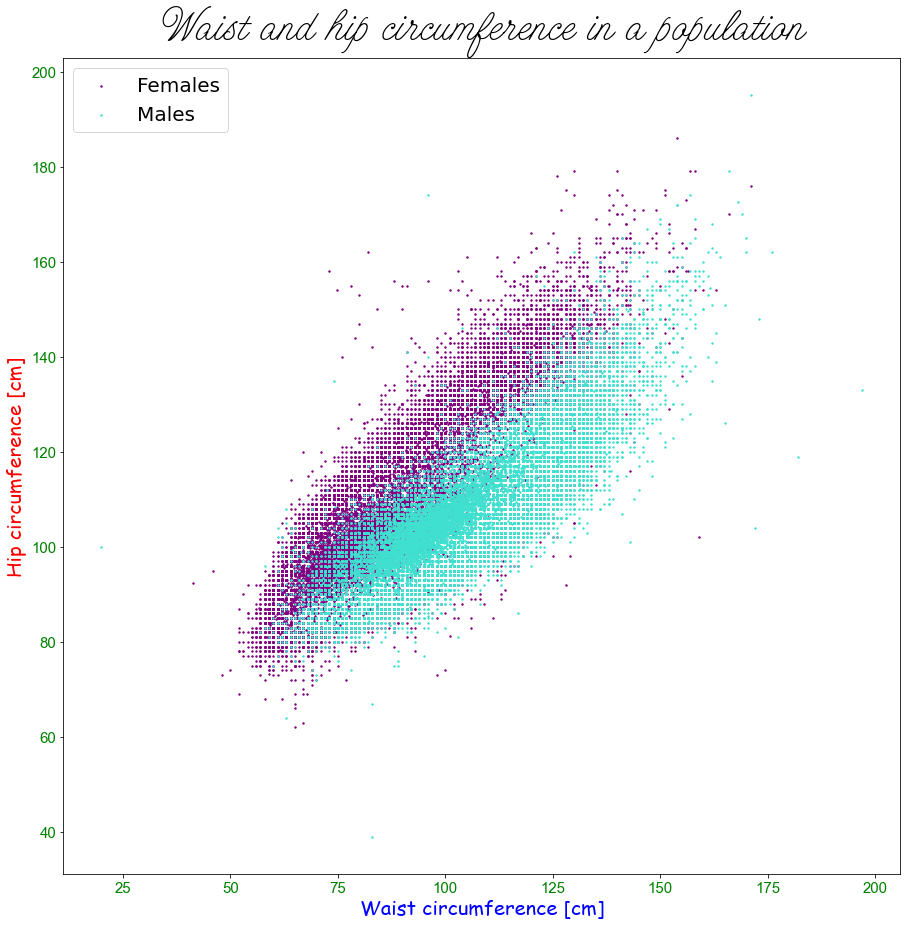

In [ ]:
# make a dictionary to specify properties of each population

#nested dictionary
gender_dictionary = { 0: {"color":'purple', 'label': 'Females'},
                     1 : {"color":'turquoise', 'label': 'Males'}}

plt.figure(figsize = (15,15))

for gender in gender_dictionary:
  df1 = df[df['Gender'] == gender]
  
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, 
              c=gender_dictionary[gender]['color'], label = gender_dictionary[gender]['label'])

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.legend(fontsize = 20) 

(0.0, 3785.5)

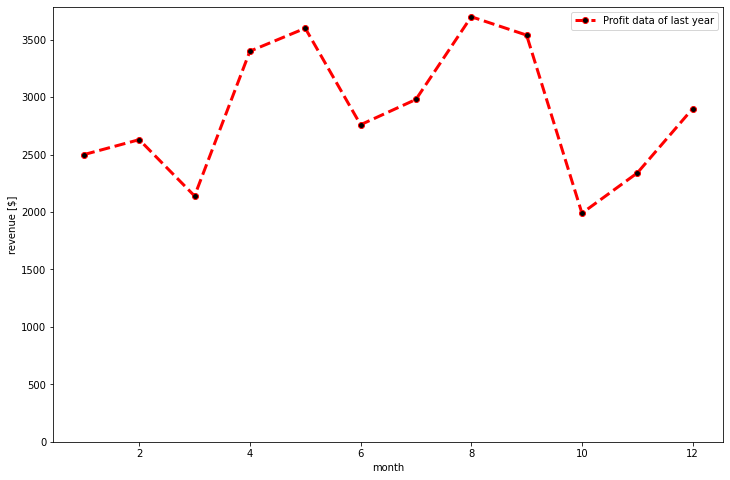

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'], label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k',  linestyle='--', linewidth=3)
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.legend()
plt.ylim(0,) # restrict the limit

(0.0, 3785.5)

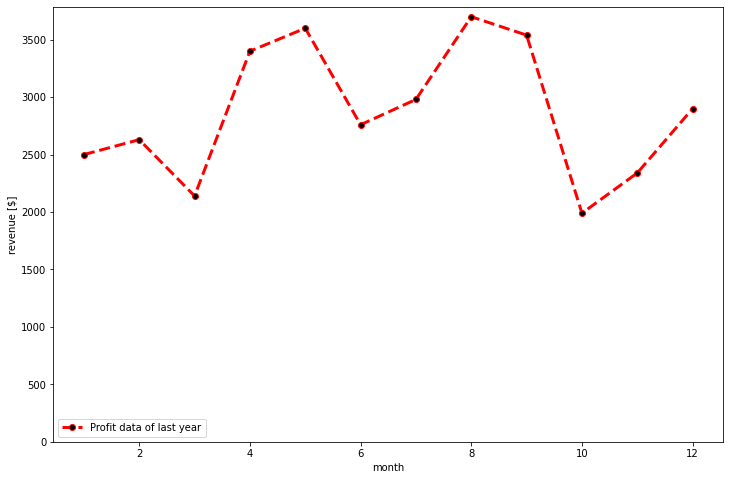

In [ ]:
plt.figure(figsize=(12,8)) 
plt.plot(sales_data['month_number'], sales_data['facecream'], label = 'Profit data of last year', 
      color='r', marker='o', markerfacecolor='k',  linestyle='--', linewidth=3)
plt.ylabel("revenue [$]")
plt.xlabel("month")
plt.legend(loc='lower left') #change the location of the label
plt.ylim(0,) 

# Save the figure

In [ ]:
# save the figure
gender_dictionary = { 0: {"color":'purple', 'label': 'Females'},
                     1 : {"color":'turquoise', 'label': 'Males'}}

plt.figure(figsize = (15,15))

for gender in gender_dictionary:
  df1 = df[df['Gender'] == gender]
  
  plt.scatter(x = df1['Waist circumference [cm]'], y = df1['Hip circumference [cm]'], s=2, 
              c=gender_dictionary[gender]['color'], label = gender_dictionary[gender]['label'])

plt.xlabel('Waist circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='b')
plt.ylabel('Hip circumference [cm]', fontproperties=fontprop3, fontsize = 20, c='r')
plt.title('Waist and hip circumference in a population', fontproperties=fontprop2, fontsize = 50)
plt.xticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.yticks(fontproperties=fontprop, c='g', fontsize = 15 )
plt.legend(fontsize = 20) 
plt.savefig('some_ugly_figure.png', dpi = 300)
plt.savefig('some_ugly_figure.svg', dpi = 300)
plt.savefig('some_ugly_figure.pdf', dpi = 300)
plt.savefig('some_ugly_figure.eps', dpi = 300)

In [ ]:
data

[        Unnamed: 0  Gender  ...  Height [cm]  Weight [Kg]
 0                0     0.0  ...        169.0         68.6
 1                1     0.0  ...        185.0         70.2
 3                3     0.0  ...        159.0         82.9
 6                6     0.0  ...        161.0         76.1
 7                7     0.0  ...        159.0         58.5
 ...            ...     ...  ...          ...          ...
 499207      502453     0.0  ...        163.0         74.5
 499208      502455     0.0  ...        159.2         61.9
 499209      502456     0.0  ...        168.0         88.6
 499211      502458     0.0  ...        158.0         59.3
 499212      502459     0.0  ...        167.0         77.2
 
 [271816 rows x 6 columns],
         Unnamed: 0  Gender  ...  Height [cm]  Weight [Kg]
 2                2     1.0  ...        164.0         71.5
 4                4     1.0  ...        186.0         94.0
 5                5     1.0  ...        168.0        101.3
 8                8     1.

# Appendix

## Colors

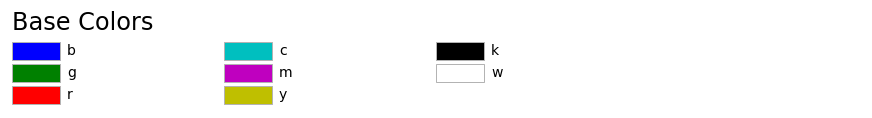

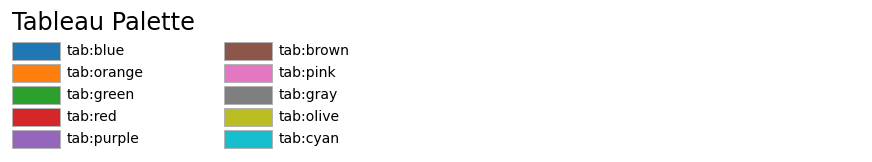


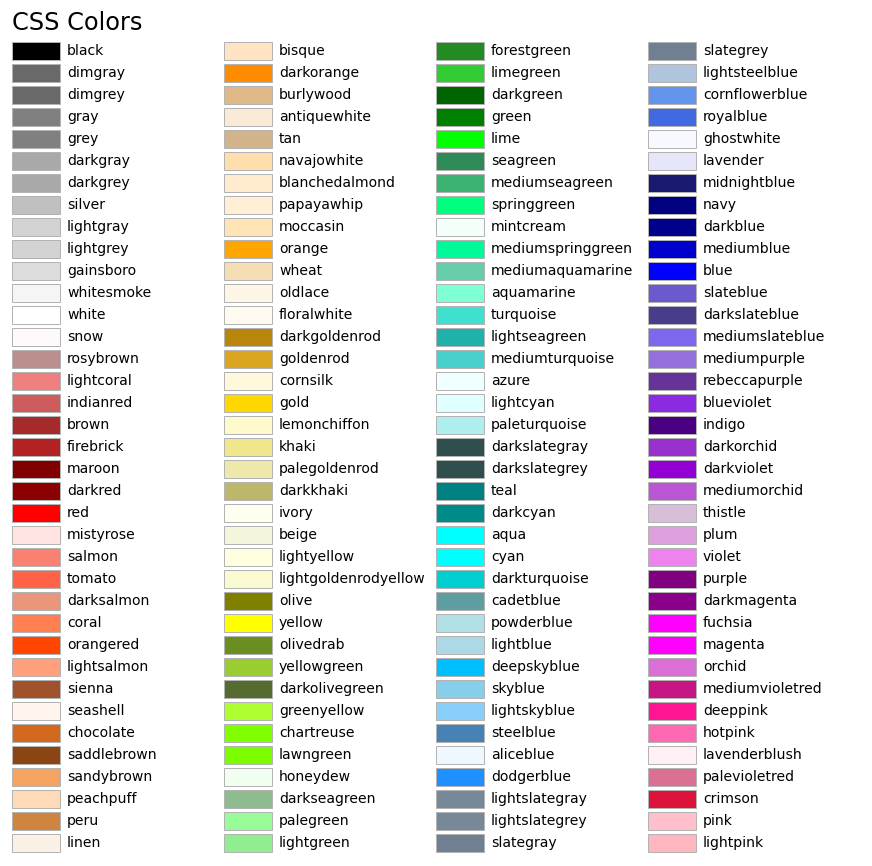

## Markers

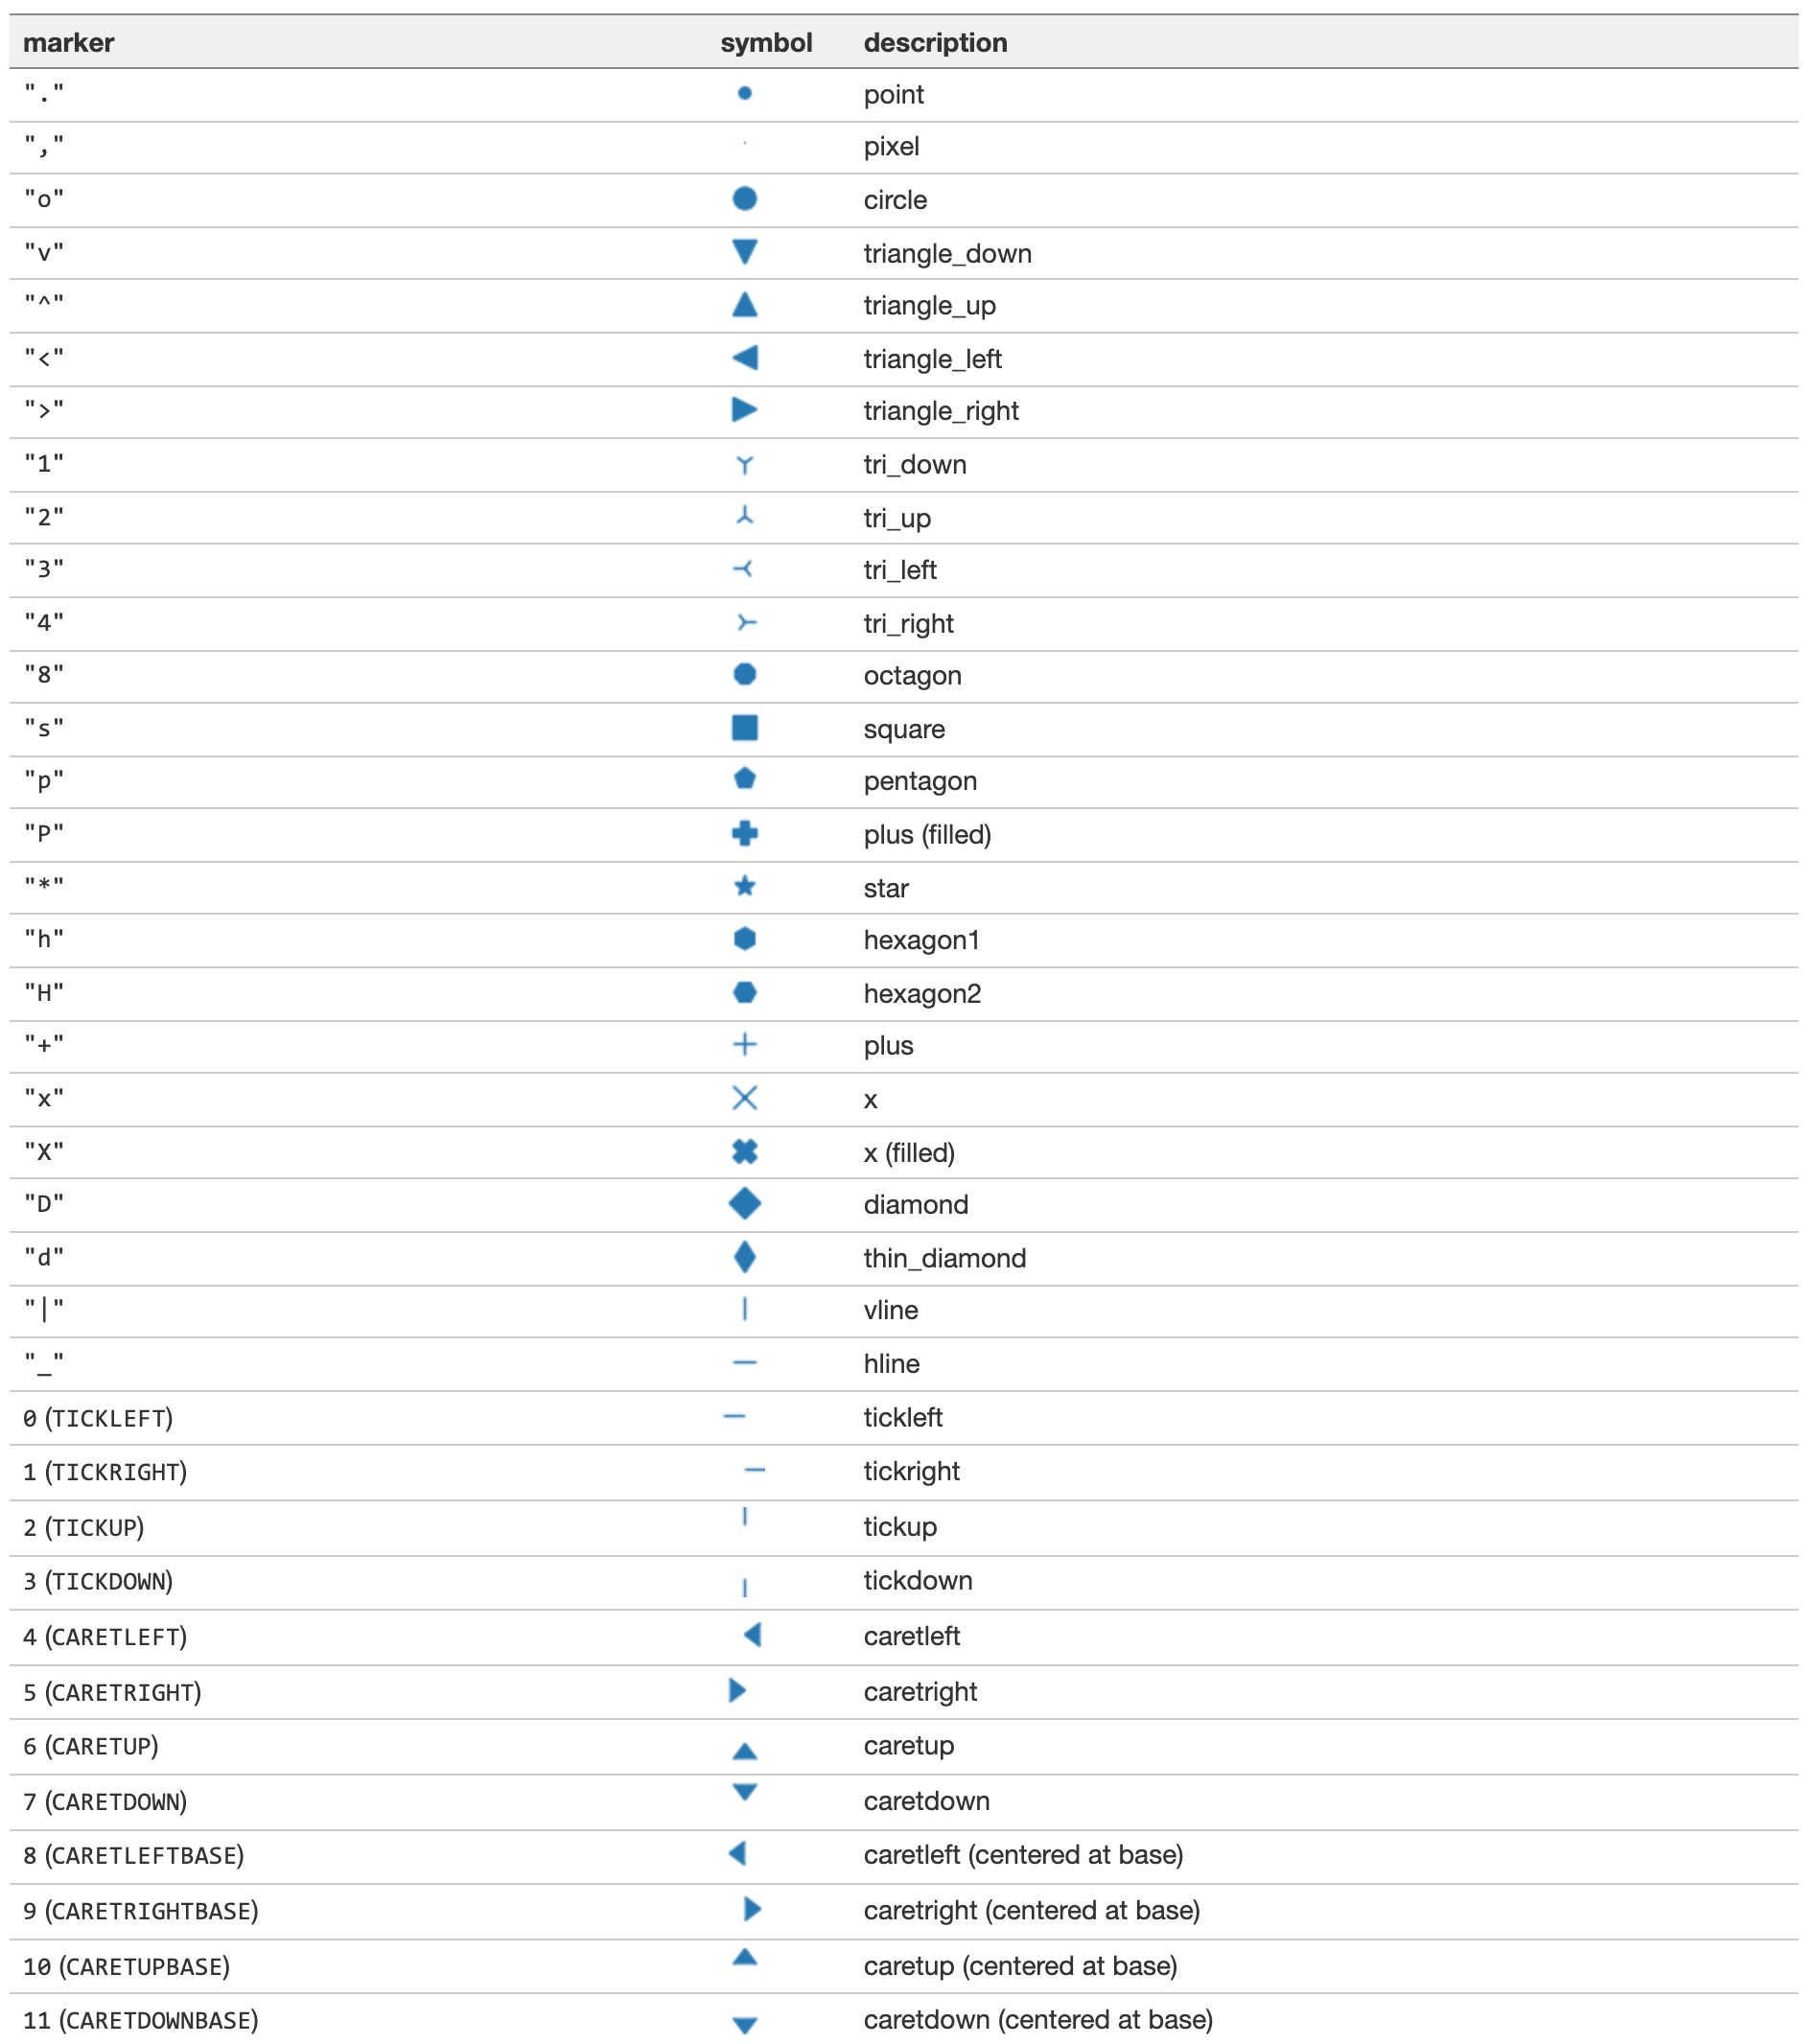

In [ ]:
#